Thomas Clay Kynor

## Final Project - **Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSoxxWIaHJQiYn89u9QhRK7CGYGzvGMXrfIaDGvi2jinp3TmorfFzrsnR0uV2xNpuHdL7F8rFKVOUMi/pub?output=csv")

Before we mess with the dataset, I wanted to look at how many suicides there are in a country in relation to the population. To do this, all we have to do is add another column called 'suicideRate' which calculates the ratio of people that commit suicide in that country/year.

In [2]:
df['suicideRate'] = (df.suicides_no/df.population)

Once we load the dataset, our first steps are to understand what we are actually looking at. To do that, we have to find out what our columns are and what they tell us, we can do this by using the .header() command.

In [3]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation', 'suicideRate'],
      dtype='object')

We can also learn more about the data set by using the .describe() command.

*This way of displaying data, although it doesn't look visually appealing whatsoever, can be very informative as it calculates the mean, max, min and other percentiles for each of our data columns.*

In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),suicideRate
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414,0.000128
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472,0.000190
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,0.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000,0.000009
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000,0.000060
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000,0.000166
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,0.002250


Now that we know a basis of the sort of information that we can get from this dataset, we can start to visually demonstrate this data so we can understand what we are looking at.

*Note: These graphs should be somewhat basic as they are just for a greater understanding of the dataset, once we get to understand the correlations between certain columns in the set, we can use more intricate graphs to display the data in different ways.* 

The first correlation we want to delve into is between suicides and years. We want to see how many collective suicides (collective total from all countries) there are in each year. To do this, we have to find a way to add up all of the suicides from each country that year into a collective number per year. To do this, we have to make a new variable called sumPerYear and we can group our suicides_no (which shows suicides in each country that year) and group those by year, to create a total.


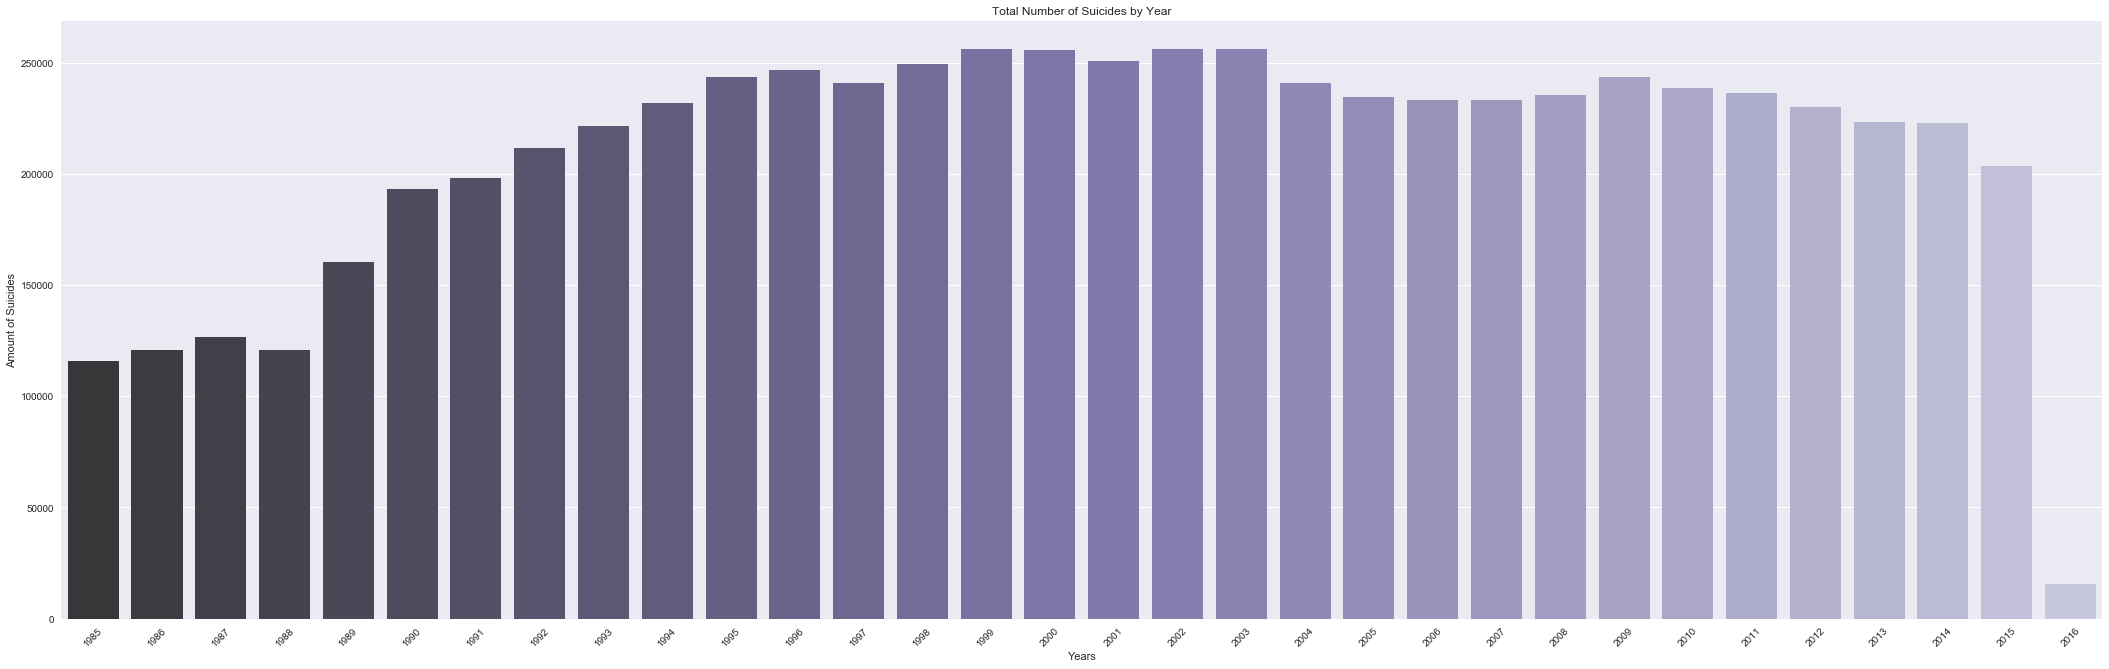

In [5]:
sumPerYear = pd.DataFrame(df['suicides_no'].groupby(df['year']).sum())
sumPerYear = sumPerYear.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_yr = sumPerYear
fig = plt.figure(figsize=(30,10))
plt.title('Total Number of Suicides by Year')
sns.set(font_scale=2.5)
sns.barplot(y='suicides_no',x='year',data=most_cont_yr,palette="Purples_d");
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Amount of Suicides')
plt.tight_layout()

The next thing we can look at is the number of suicides in each country for the past years. To do this, we have to add the amount of suicides for each year up together to find how many people in the past 31 years have committed suicide in these countries. We do this the with the excat same grouping method as used in the previous example.

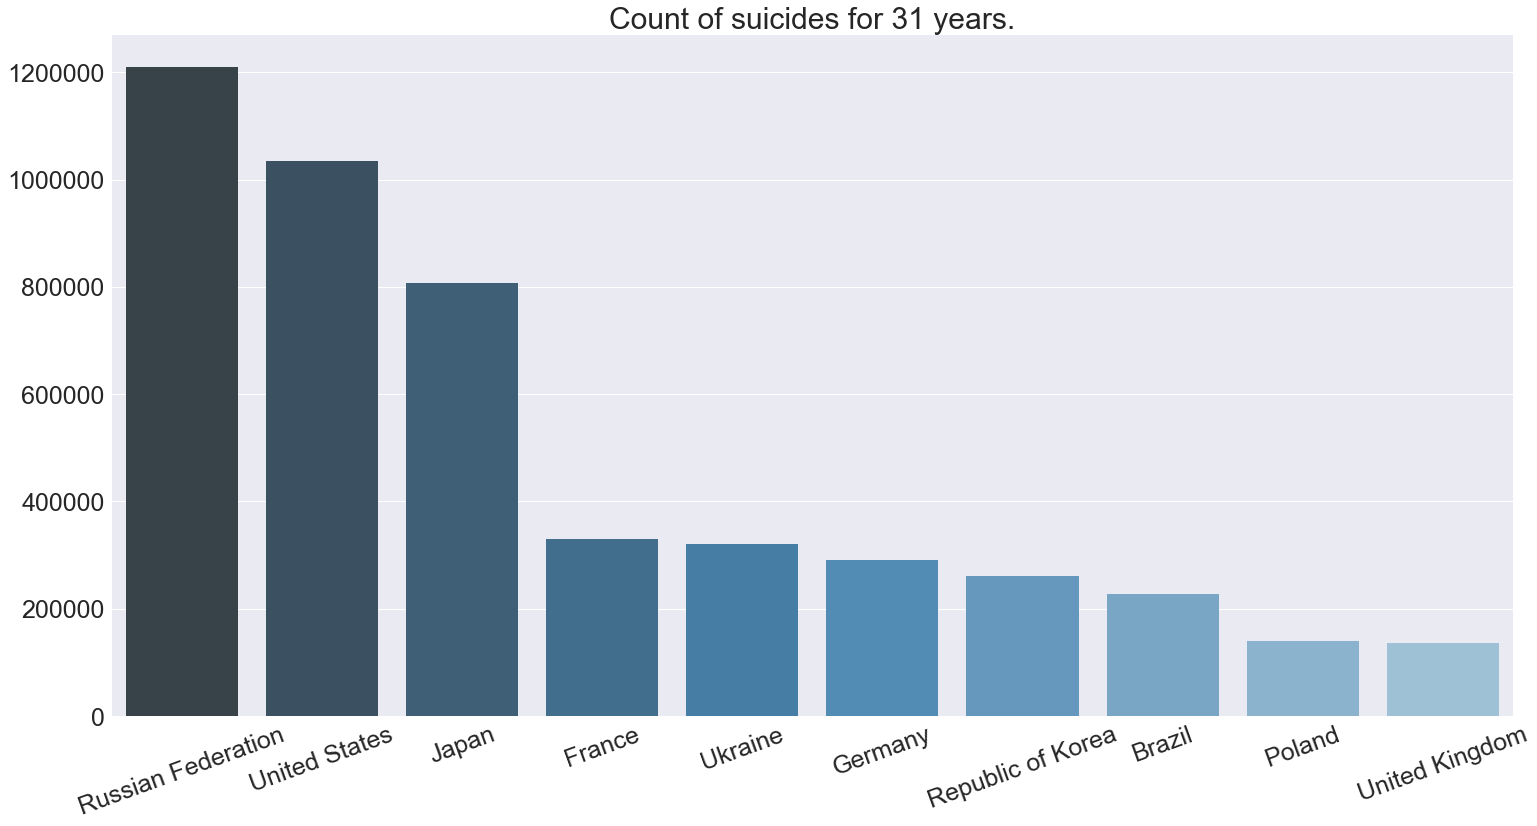

In [6]:
sumPerYear = pd.DataFrame(df['suicides_no'].groupby(df['country']).sum())
sumPerYear = sumPerYear.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont = sumPerYear.head(10)
fig = plt.figure(figsize=(22,12))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='country',data=most_cont,palette="Blues_d")
plt.xticks(rotation=20)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

As we can see, the Russian Federation has the highest suicide numbers at over 1,200,000 suicides in the past 31 years. For the past two graphs so far, we have used a bar plots. Two advantages of using a bar plot is that it is somewhat easy to set up and you don't necessarily have to worry about input types so it is a relatively easy graph to use. Another benefiet of using a barplot while graphing is that you can easily see the correlation between different things, like in the first example you could see how the suicide totals changed over the years, and easily visualize the trends.

Another type of barplot we will try is to make a horizontal barplot of all countries in the past years and their suicide rates in relation to their population. This will give us a more accurate representation of the suicides in each country as our previous graphs doesn't consider population. Theoretically, the more people you have, the more amount of people in your country that are going to commit suicide. That might explain the why the United States and Russian Federation's suicide numbers are so overwhelming. 

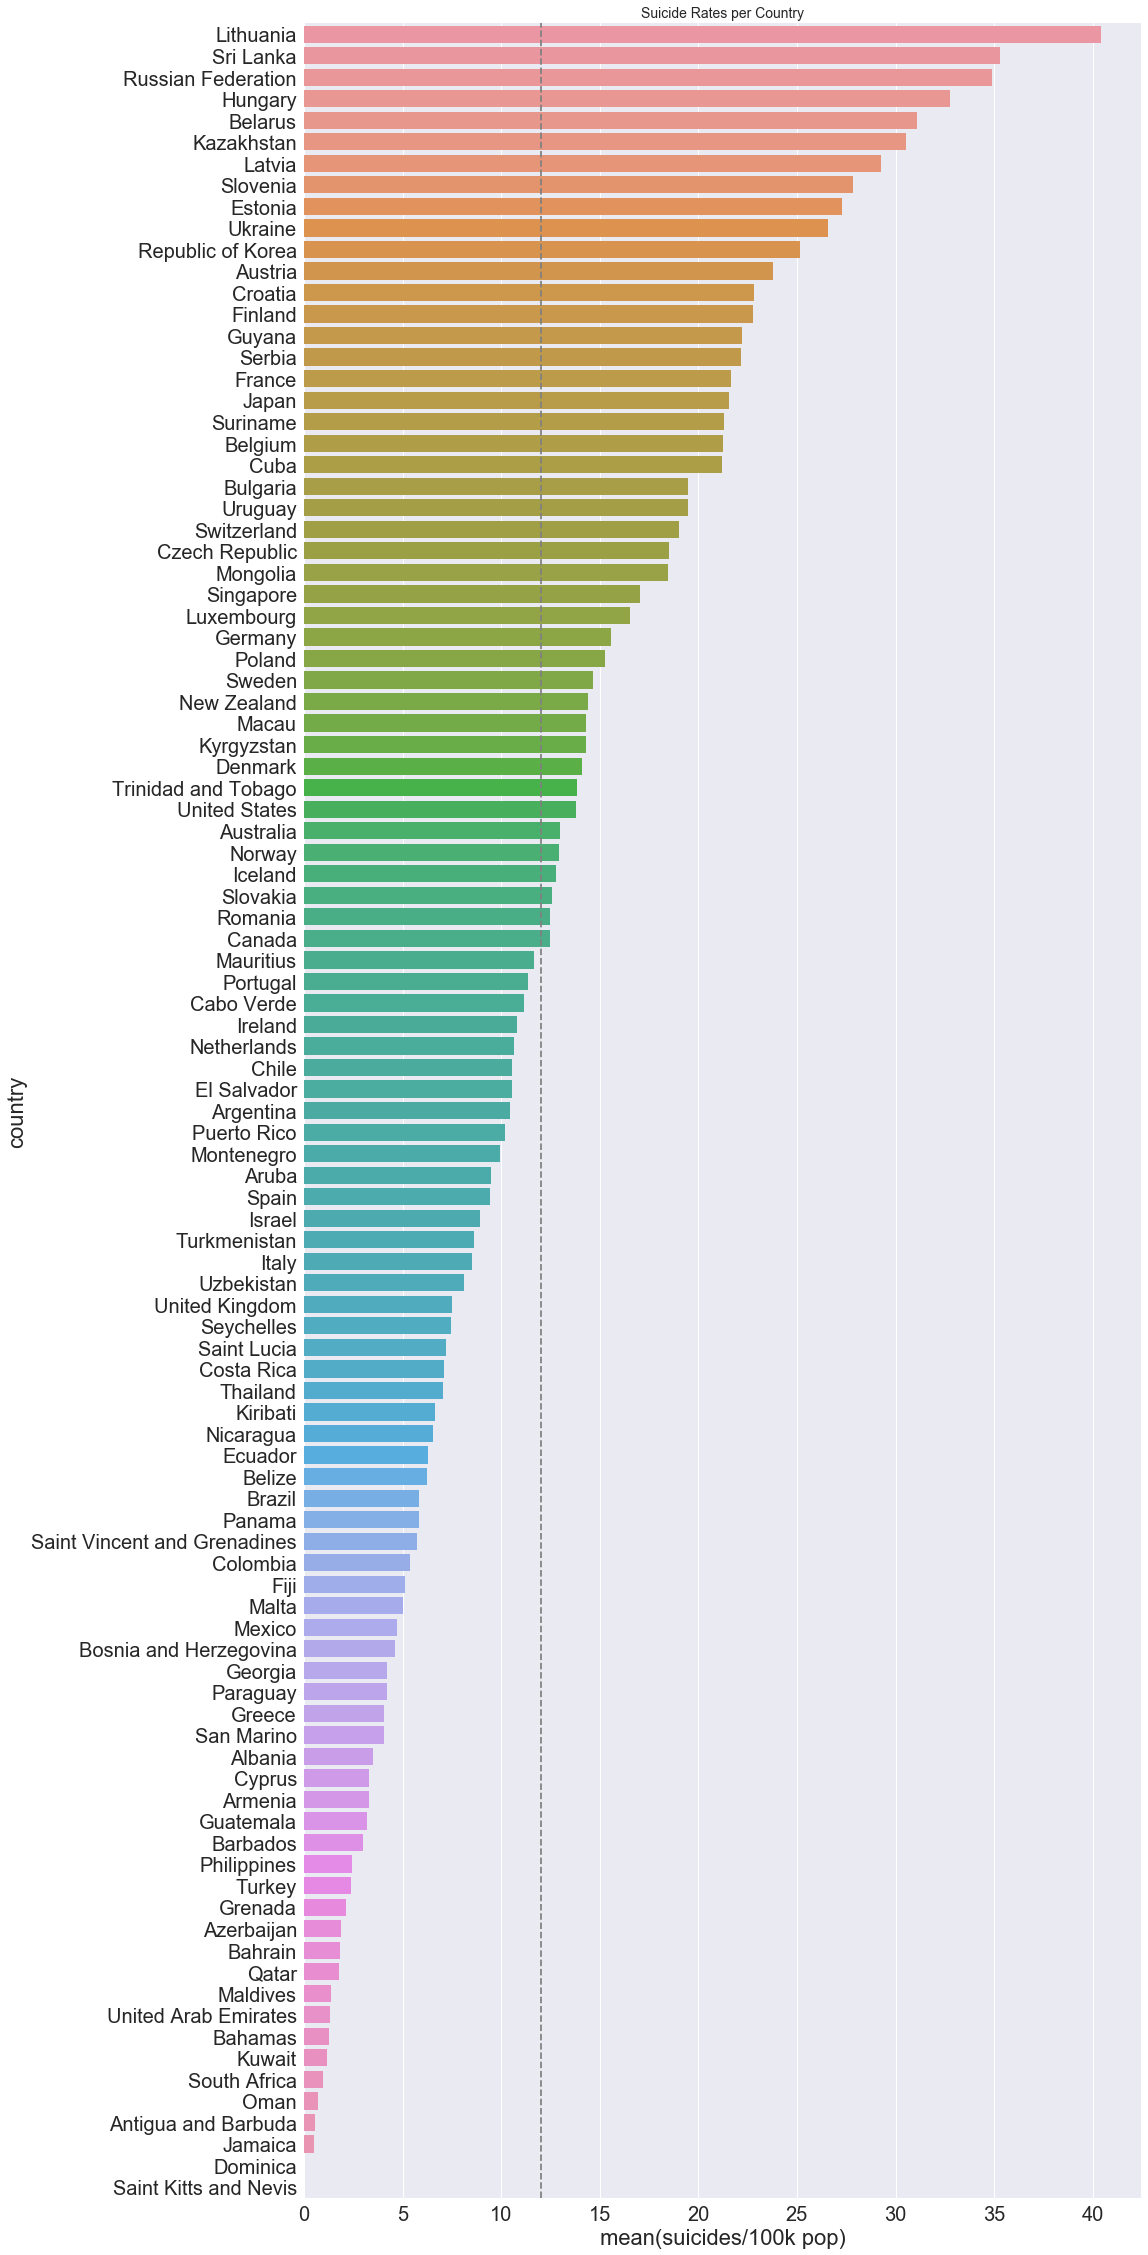

In [7]:
suicideRate = df['suicides/100k pop'].groupby(df['country']).mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,40))
plt.title('Suicide Rates per Country', fontsize=14)
plt.axvline(x=suicideRate['suicides/100k pop'].mean(),color='gray',ls='--')
sns.barplot(data=suicideRate, y='country',x='suicides/100k pop')

Look at how low the United States is with this graph compared to Lithuania!

Another interesting thing we can do to dig further into this data set and learn about barplots more, is that we can make a similar barplot, yet this time, we can show the top countries for suicides in the past 31 years, and seperate our data even more to show suicide rates by gender in these countries. We can also change the color palatte of the graph using seaborn (sns).

Suprisingly, this data set shows that in these top countries, the number of male suicides far outweigh female suicides. Another interesting thing that we can see in this dataset is that Japan, despite having the third highes male suicide rate, has the highest female suicide rate.

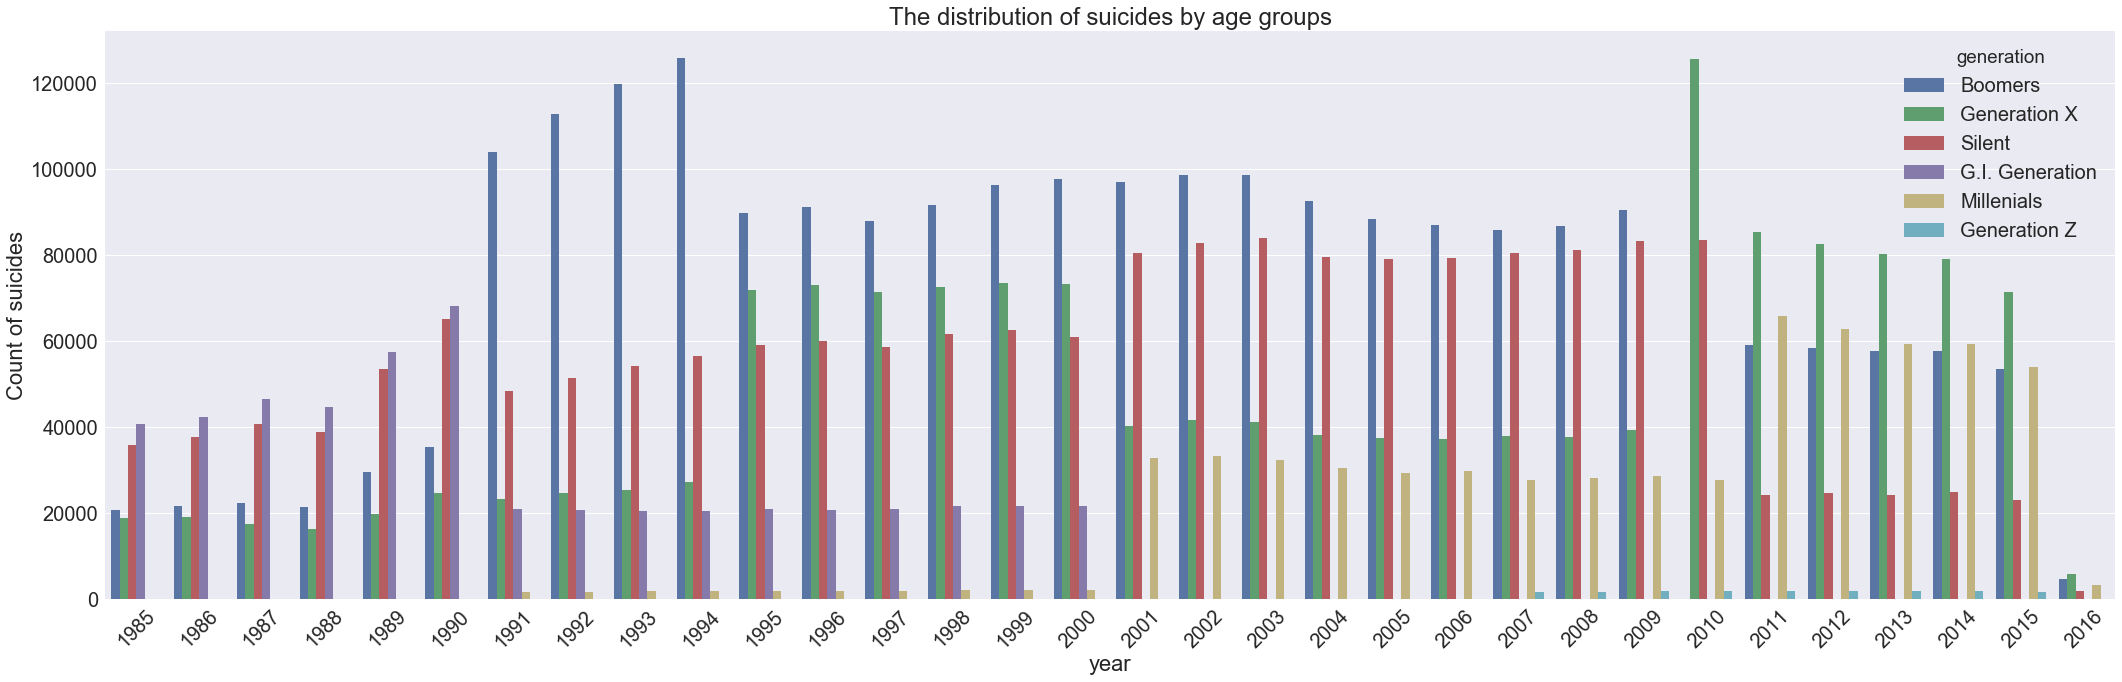

In [8]:
suic_sum_yr = pd.DataFrame(df['suicides_no'].groupby([df['generation'],df['year']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('The distribution of suicides by age groups')

sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',hue='generation',data=most_cont_yr,palette='deep');
plt.ylabel('Count of suicides')
plt.xticks(rotation=45)
plt.tight_layout()

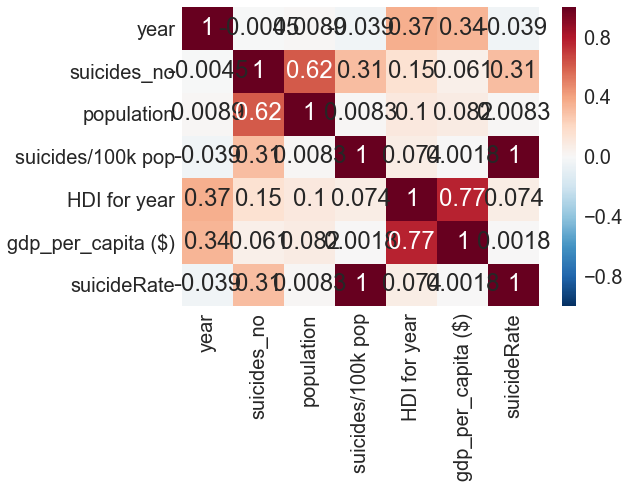

In [9]:
_ = sns.heatmap(df.corr(), annot=True)
sns.set(font_scale=0.9)

In [10]:
values = df['generation']

f,ax=plt.subplots(1,figsize=(18))
labels = ['Silent','Gen X', 'Gen Z', 'Baby Boomers', 'Millenials', 'G.I. Generation']
df['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1], labels = labels, autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
plt.show()

TypeError: from_bounds() argument after * must be an iterable, not int

**Thomas Clay Kynor**

**Computer Programming Final Write Up - Analysis of Data Science Majors in Colleges**

   The study of data science is incredibly new, as five years ago there was no such thing as a data science major in any colleges in the US (3). However, nowadays there are  603 colleges allow students to study in this field (1). positions such as Junior Data Analyst or Junior Data Scientist.  System-specific training or certifications in data-related fields (e.g., business intelligence applications, relational database management systems, data visualization software, etc.) might help when looking for entry-level data science jobs (2). A major typically requires between 10 and 16 data science courses for degree completion, while a minor normally only requires 4 to 6. As for job opportunities when leaving college and entering the workforce, data scientists right out of college can expect to earn an outstanding `$`95,000 (4).

With enough experience and knowledge in the workplace, experienced data scientists can earn anywhere from `$`250,000 and up (4). However despite the monetary aspect of the job, due to the recent influx of people studying to be data scientists, as the number of undergraduate degrees in statistics has tripled in the past decade (4), this is one of the most demanding occupations as you have to master many different languages and put in incredibly long hours. As I was researching for this project, I came in contact with one of my brother's friends at Lehigh University. Despite this college not being ivy league, yet still a decent school with around a 30% acceptance rate, he was hired by Google right out of undergrad and is now making around `$`120,000  a year with promises of his salary going up after a couple years on the job. Now this is an absurd amount of money for anyone to be making with their first job with only an undergraduate degree; however, he has to work 60+ hour work weeks and he tells me that the job is incredibly strenuous.

I was interested in the monetary aspect of this (because who doesn't like money) so I took this run-down of this from the University of Wisconnsin

**Data scientist:**
*Those with the job title of “data scientist” are generally experienced, expert-level professionals in data-driven organizations*

Salary range: `$85,000-170,000`

**Data analyst**
*Data analysts work hands-on with data and tend to be at a point in their careers when they are focused on building up data science tools and skill sets.*

Entry-level salary: `$50,000-$75,000`

Experienced salary: `$65,000-$110,000`

**Data science/analytics manager**
*These professionals have one to three direct reports, sharp technical and quantitative skills, and strong leadership and business aptitude.*

Salary range: 90,000-140,000

**Big data engineer**
*Engineers can solve problems and drive business value by building the platforms and applications that data scientists use to perform data analytics.*

Junior/generalist salary: `$70,000-$115,000`

Domain expert salary: `$100,000-$165,000`


In [ ]:
from IPython.display import Image
Image("Screenshot 2019-05-28 at 2.34.06 PM.png")

Looking at some of this data, I was suprised by the amount my friend was getting paid at Google, as it didn't seem to corraborate with some of the numbers that the University of Wisconnsin was putting out. After doing some further digging, I discovered that these huge companies pay way more for data scientists (as would be expected) than other startups. I was interested in this, so I looked further and found this:

Median Salaries of Data Scientists at the largest firms in the country.

Google: `$152,856`

Apple: `$145,974`

Twitter: `$135,360`

Facebook: `$134,715`

PayPal: `$132,909`

Airbnb: `$127,852`

Microsoft: `$123,328`

**Sources:**

*Sources for Code*

1. Blah blah

*Write-Up Sources*

1. http://datascience.community/colleges

2. https://www.discoverdatascience.org/career-information/data-scientist/

3. https://www.govtech.com/education/higher-ed/Statistics-and-Data-Science-Degrees-Overhyped-or-the-Real-Deal.html

4. https://datasciencedegree.wisconsin.edu/data-science/data-scientist-salary/